# Réalisation d'une analyse statistique avec le langage R
Dans un premier temps, nous allons récupérer les données dans le CSV

In [108]:
# Charger les données
source("charger.R")
mondata <- charger(2105482)
Y <- mondata$Sales
X1 <- mondata$Price
X2 <- mondata$Advertising
X3 <- mondata$Region

In [109]:
# Afficher les données
mondata

,Sales,Price,Advertising,Region
,<dbl>,<int>,<int>,<int>
150,4.67,111,0,0
68,12.01,94,0,1
273,9.40,96,17,0
43,5.05,117,0,1
5,6.42,126,5,1
218,8.47,112,0,0
159,10.43,24,0,1
74,11.62,139,4,1
209,6.98,97,0,0


# Histogramme des ventes

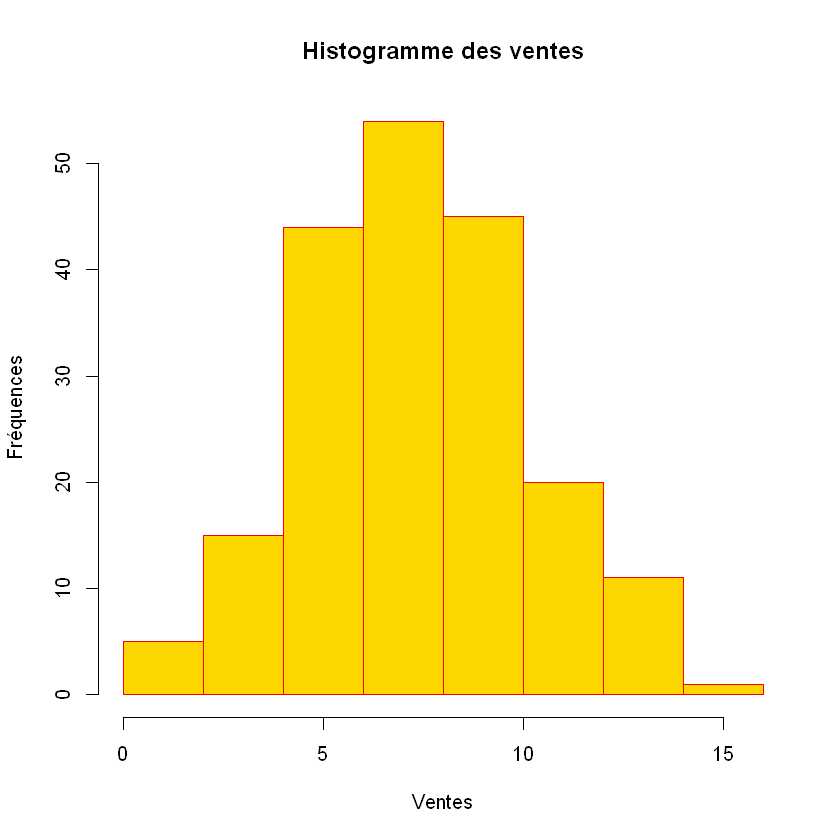

In [110]:
hist(Y, col="gold",border="red", main=paste("Histogramme des ventes"),
     xlab="Ventes",ylab="Fréquences")

# Diagramme de Tukey pour les ventes

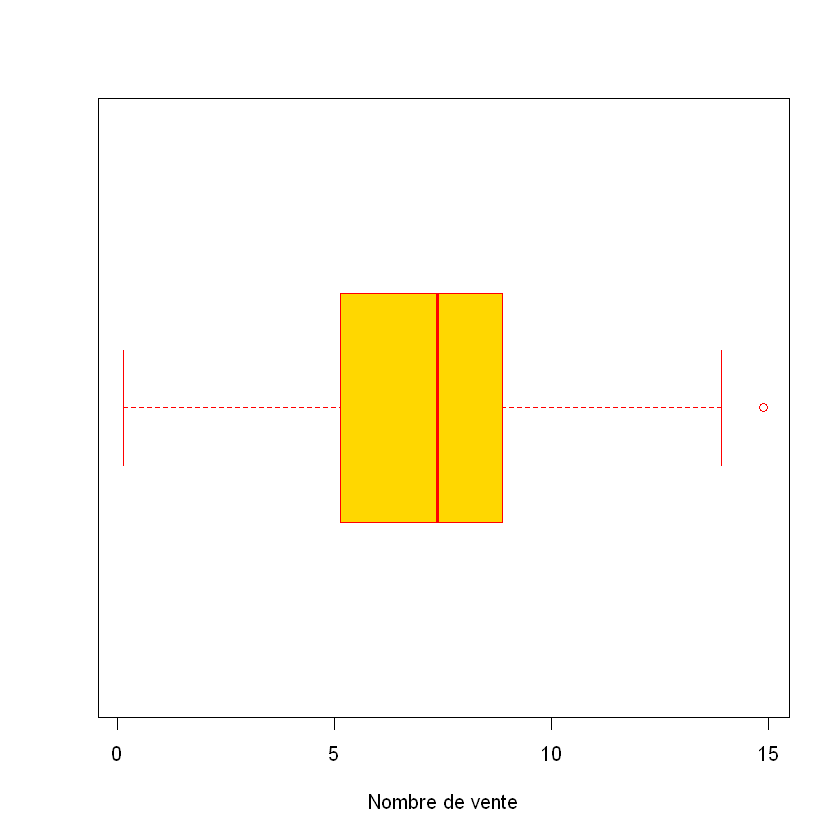

In [111]:
boxplot(Y,
horizontal=TRUE,
col="gold",border="red",
xlab="Nombre de vente")

# Droite de Henry

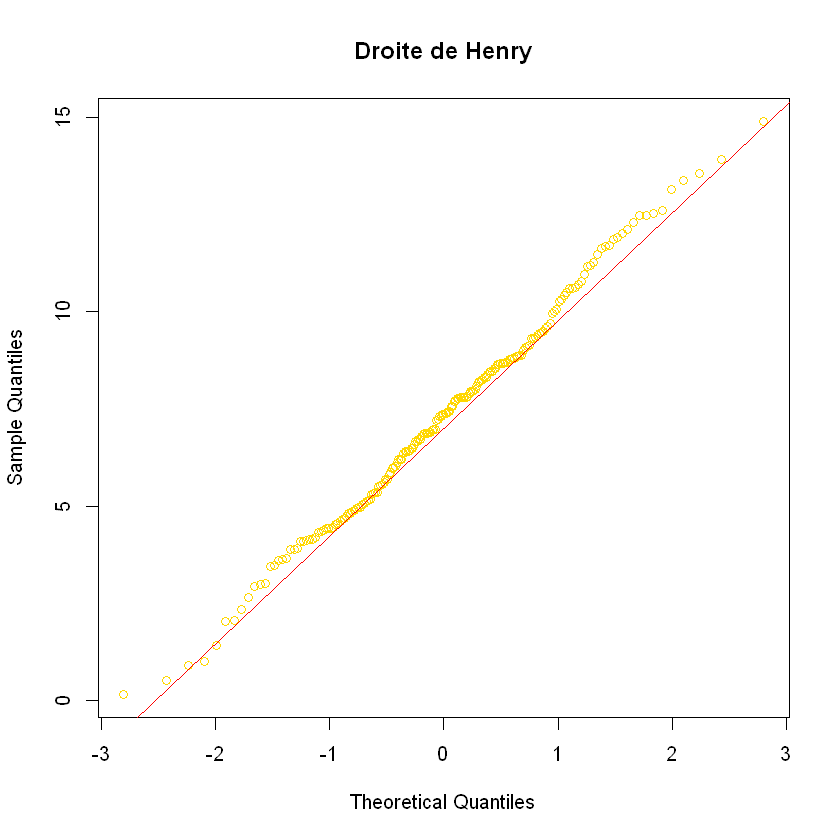

In [112]:
qqnorm(Y, col ="gold", main=paste("Droite de Henry"))
qqline(Y, col ="red")


# Test de normalité (Shapiro-Wilk)

In [113]:
shapiro.test(Y)


	Shapiro-Wilk normality test

data:  Y
W = 0.99463, p-value = 0.7128


# Interprétation du test de normalité (Shapiro-Wilk)
La statistique W représente la correlation entre les quantiles de notre variable de vente et les quantiles théoriques d'une normale de moyenne 0 et de variance 1.
Dans notre cas w = 0.99463 ce qui est très prêt de 1 donc les quantiles de notre variable sont très prêt de ce d'une normale.
De plus notre p-value = 0.7128 est très élevée comparativement à 0.05
Nous pouvons donc dire que nos données sont conformes à une distribution normale  

# Tableau de statistique descriptive

In [114]:
mesureStatistique = data.frame(mondata=c("Sales"), 
                     moyenne=NA, écartType=NA, q1=NA, mediane=NA,
                     q3=NA, IntervalConfiance=NA)
# moyenne,
mesureStatistique$moyenne = sapply(2, function(i) mean(Y)) 
# quartiles q1, q2 = mediane, q3 
mesureStatistique[1, c("q1", "mediane", "q3")] = quantile(Y, probs = c(0.25,0.5,0.75))
# écart type,
mesureStatistique$écartType = sapply(2, function(i) sd(Y)) 
# intervalle de confiance pour la moyenne
ci <- t.test(Y, conf.level = 0.95)$conf.int
# cat("95% Confidence Interval: [", ci[1], ", ", ci[2], "]\n")
mesureStatistique$IntervalConfiance = sprintf("[%f, %f]", ci[1], ci[2])

# Afficher le resultat
mesureStatistique

mondata,moyenne,écartType,q1,mediane,q3,IntervalConfiance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Sales,7.301692,2.826037,5.14,7.37,8.88,"[6.902551, 7.700833]"


# PARTIE C: Meilleur modèle

## Étude du modèle 1
Y = beta0 + beta1*X1 + epsilon

### Graphe de regression

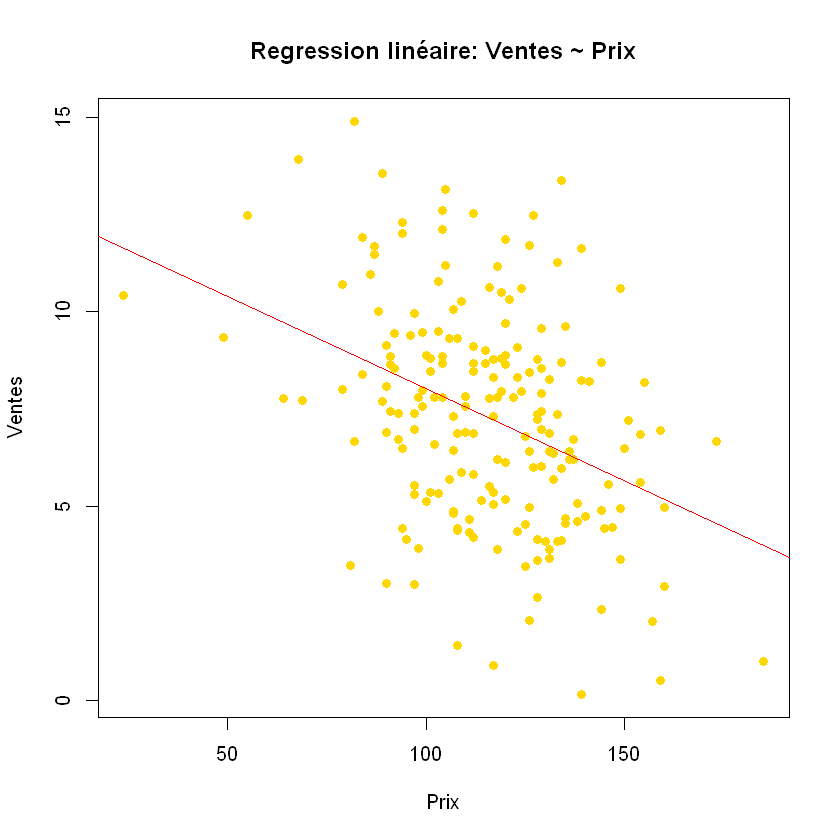

In [115]:
modele1 <- lm(Y ~ X1)

# Create a scatter plot of log(Y) against X1
plot(X1, Y, main = "Regression linéaire: Ventes ~ Prix", col = "gold",
     xlab = "Prix", ylab = "Ventes", pch = 16)

# Add the regression line
abline(modele1, col = "red")

### Tableau d'analyse de la variance

In [116]:
summary(modele1)
anova(modele1)


Call:
lm(formula = Y ~ X1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3180 -1.8301 -0.0789  1.6660  6.9688 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.78009    0.96962  13.180  < 2e-16 ***
X1          -0.04745    0.00824  -5.759  3.3e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.617 on 193 degrees of freedom
Multiple R-squared:  0.1466,	Adjusted R-squared:  0.1422 
F-statistic: 33.16 on 1 and 193 DF,  p-value: 3.297e-08


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,227.1851,227.185145,33.16213,3.297069e-08
Residuals,193,1322.1930,6.850741,NA,NA


### Analyse des résidus

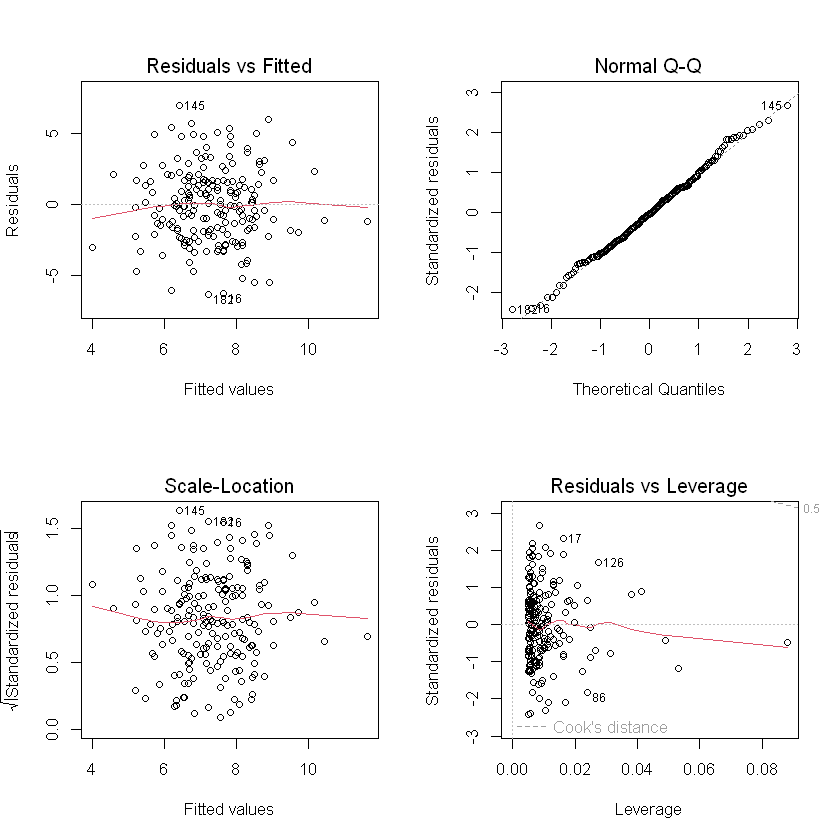

In [117]:
par(mfrow = c(2,2))
plot(modele1)

### Interval de confiance de beta0 et beta1

In [118]:
conf_int <- confint(modele1)
cat("Intervalle de confiance pour beta0 (intercept): ", conf_int["(Intercept)","2.5 %"], " - ", conf_int["(Intercept)","97.5 %"], "\n")
cat("Intervalle de confiance pour beta1 (pente): ", conf_int["X1","2.5 %"], " - ", conf_int["X1","97.5 %"], "\n")

Intervalle de confiance pour beta0 (intercept):  10.86768  -  14.69251 
Intervalle de confiance pour beta1 (pente):  -0.06370712  -  -0.03120117 


## Étude du modèle 4
Y = beta0 + beta1*X2 + epsilon

### Graphe de regression

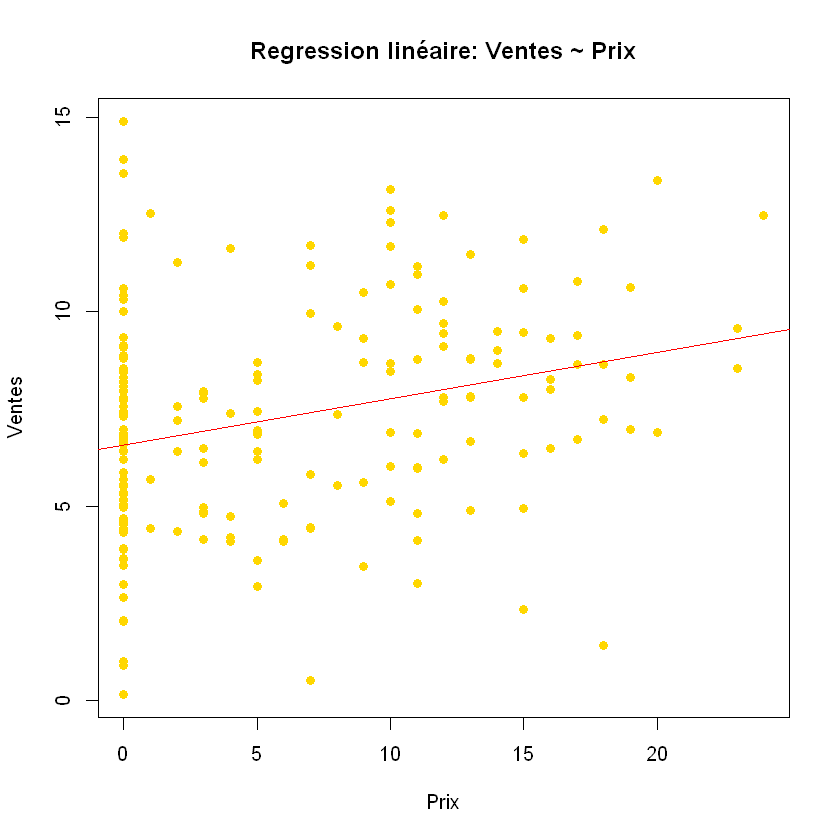

In [119]:
modele4 <- lm(Y ~ X2)

# Create a scatter plot of log(Y) against X1
plot(X2, Y, main = "Regression linéaire: Ventes ~ Prix", col = "gold",
     xlab = "Prix", ylab = "Ventes", pch = 16)

# Add the regression line
abline(modele4, col = "red")

### Tableau d'analyse de la variance

In [120]:
summary(modele4)
anova(modele4)


Call:
lm(formula = Y ~ X2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3061 -1.9691 -0.0761  1.6482  8.3197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.58032    0.26632  24.708  < 2e-16 ***
X2           0.11921    0.02996   3.978 9.81e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.724 on 193 degrees of freedom
Multiple R-squared:  0.07579,	Adjusted R-squared:  0.071 
F-statistic: 15.83 on 1 and 193 DF,  p-value: 9.81e-05


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X2,1,117.4309,117.430892,15.82751,9.810356e-05
Residuals,193,1431.9472,7.419416,NA,NA


### Analyse des résidus

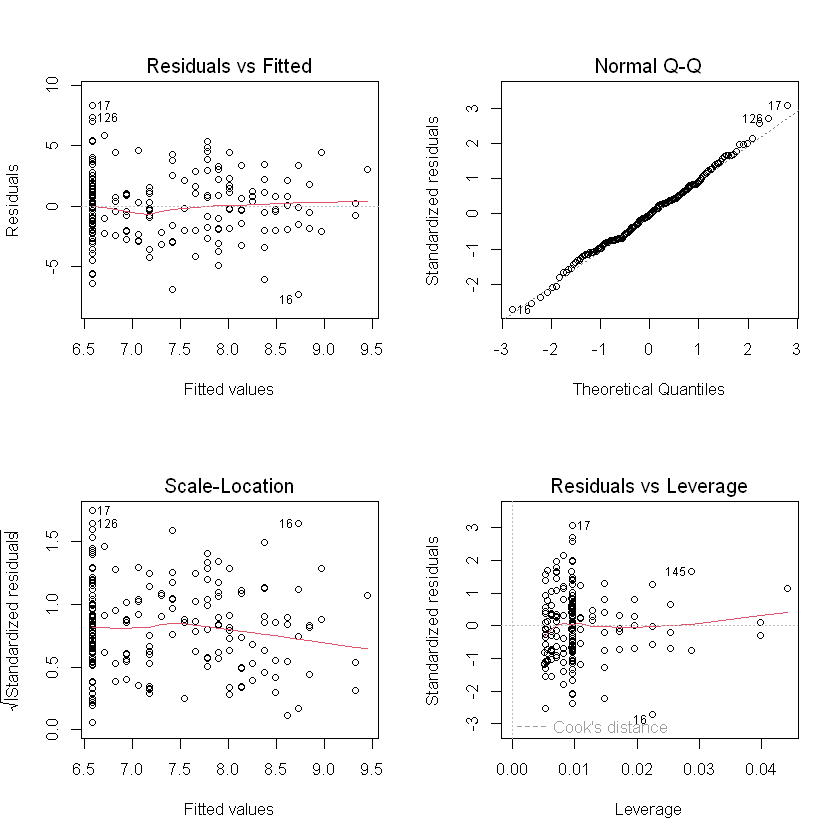

In [121]:
par(mfrow = c(2,2))
plot(modele4)

### Interval de confiance de beta0 et beta1

In [122]:
conf_int <- confint(modele4)
cat("Intervalle de confiance pour beta0 (intercept): ", conf_int["(Intercept)","2.5 %"], " - ", conf_int["(Intercept)","97.5 %"], "\n")
cat("Intervalle de confiance pour beta1 (pente): ", conf_int["X2","2.5 %"], " - ", conf_int["X2","97.5 %"], "\n")

Intervalle de confiance pour beta0 (intercept):  6.055054  -  7.105594 
Intervalle de confiance pour beta1 (pente):  0.06010972  -  0.1783085 


## Étude du modèle 2
Y = beta0*(X1^beta1)*exp(epsilon)

### Graphe de regression

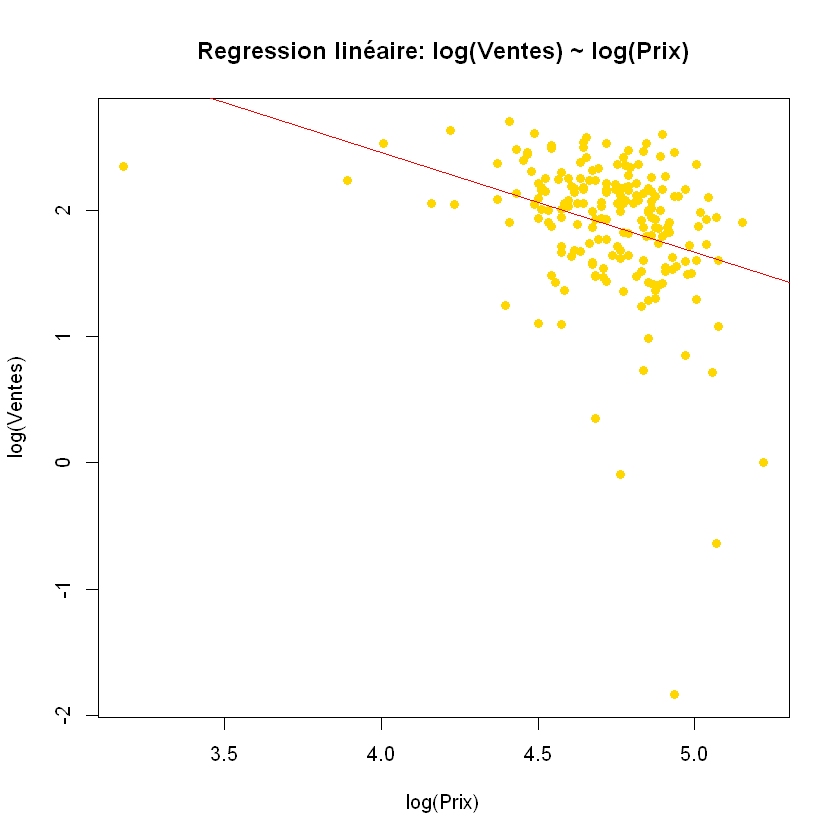

In [123]:
modele2 <- lm(log(Y) ~ log(X1))

# Create a scatter plot of log(Y) against X1
plot(log(X1), log(Y), main = "Regression linéaire: log(Ventes) ~ log(Prix)", col = "gold",
     xlab = "log(Prix)", ylab = "log(Ventes)", pch = 16)

# Add the regression line
abline(modele2, col = "red")

### Tableau d'analyse de la variance

In [124]:
summary(modele2)
anova(modele2)


Call:
lm(formula = log(Y) ~ log(X1))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5493 -0.2094  0.0945  0.3203  0.8489 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.5988     0.7790   7.187 1.41e-11 ***
log(X1)      -0.7867     0.1646  -4.779 3.49e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5234 on 193 degrees of freedom
Multiple R-squared:  0.1058,	Adjusted R-squared:  0.1012 
F-statistic: 22.83 on 1 and 193 DF,  p-value: 3.49e-06


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(X1),1,6.254782,6.2547816,22.83441,3.490291e-06
Residuals,193,52.866401,0.2739192,NA,NA


### Analyse des résidus

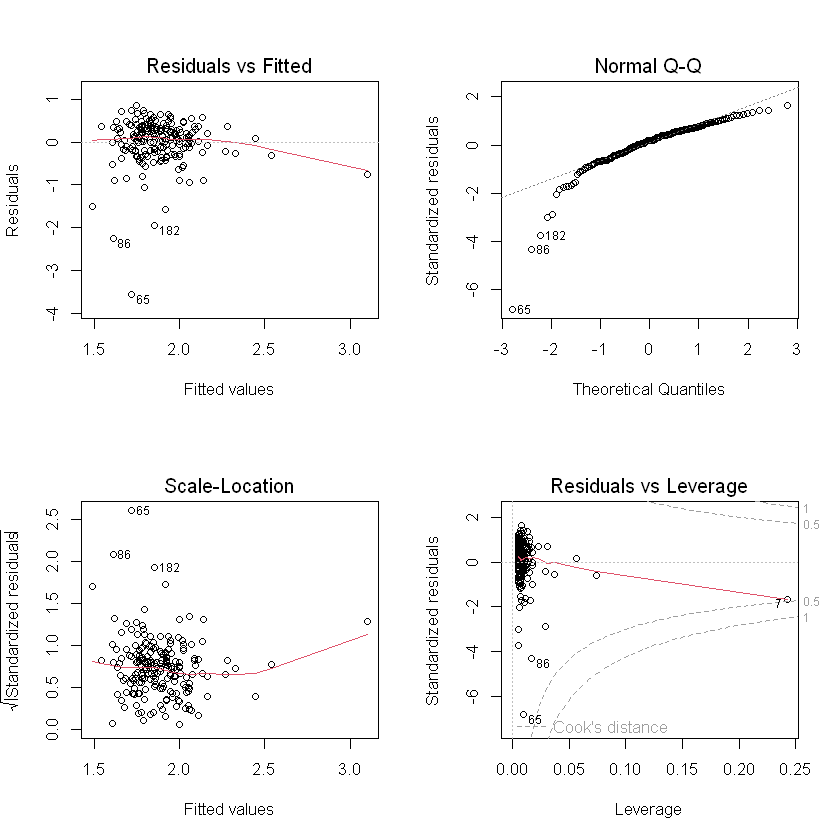

In [125]:
par(mfrow = c(2,2))
plot(modele2)

### Interval de confiance de beta0 et beta1

In [126]:
# Obtenir les intervalles de confiance des coefficients
conf_int <- confint(modele2) # Calculer les intervalles de confiance
# Afficher les résultats
conf_int


,2.5 %,97.5 %
(Intercept),4.062416,7.1352026
log(X1),-1.111443,-0.4620053


## Étude du modèle 5
Y = beta0*(X2^beta1)*exp(epsilon)

### Graphe de regression

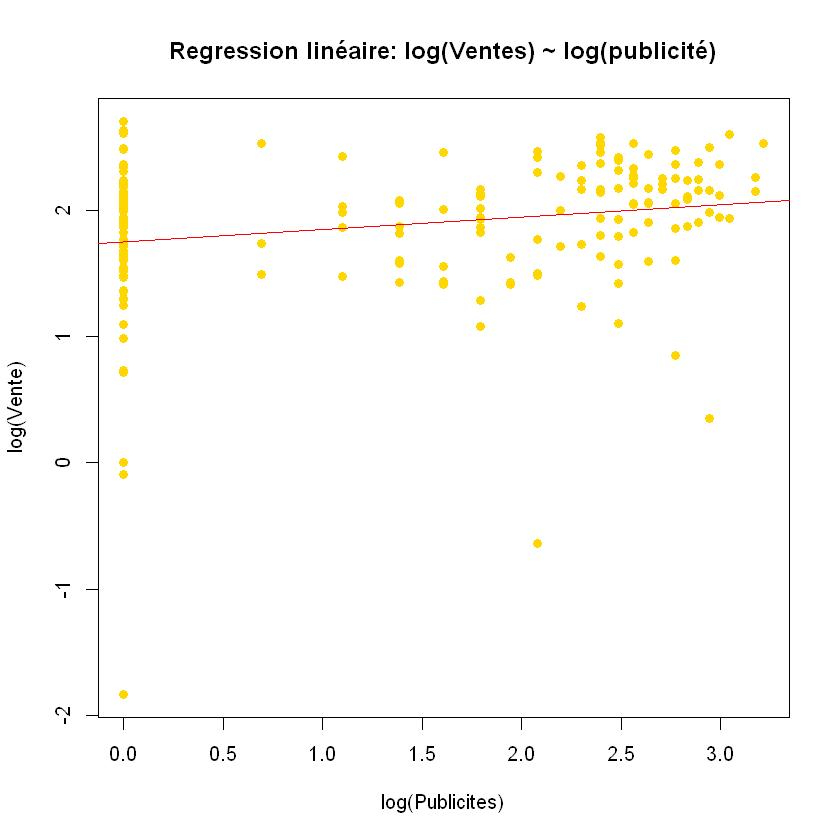

In [127]:
modele5 <- lm(log(Y) ~ log(X2+1))

# Create a scatter plot of log(Y) against X2
plot(log(X2+1), log(Y), main = "Regression linéaire: log(Ventes) ~ log(publicité)", col = "gold",
     xlab = "log(Publicites)", ylab = "log(Vente)", pch = 16)

# Add the regression line
abline(modele5, col = "red")

### Tableau d'analyse de la variance

In [128]:
summary(modele5)
anova(modele5)


Call:
lm(formula = log(Y) ~ log(X2 + 1))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5813 -0.2042  0.1092  0.3236  0.9527 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.74868    0.05845  29.916   <2e-16 ***
log(X2 + 1)  0.09768    0.03238   3.017   0.0029 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5409 on 193 degrees of freedom
Multiple R-squared:  0.04504,	Adjusted R-squared:  0.04009 
F-statistic: 9.103 on 1 and 193 DF,  p-value: 0.002896


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(X2 + 1),1,2.662934,2.6629339,9.103121,0.002895722
Residuals,193,56.458249,0.2925298,NA,NA


### Analyse des résidus

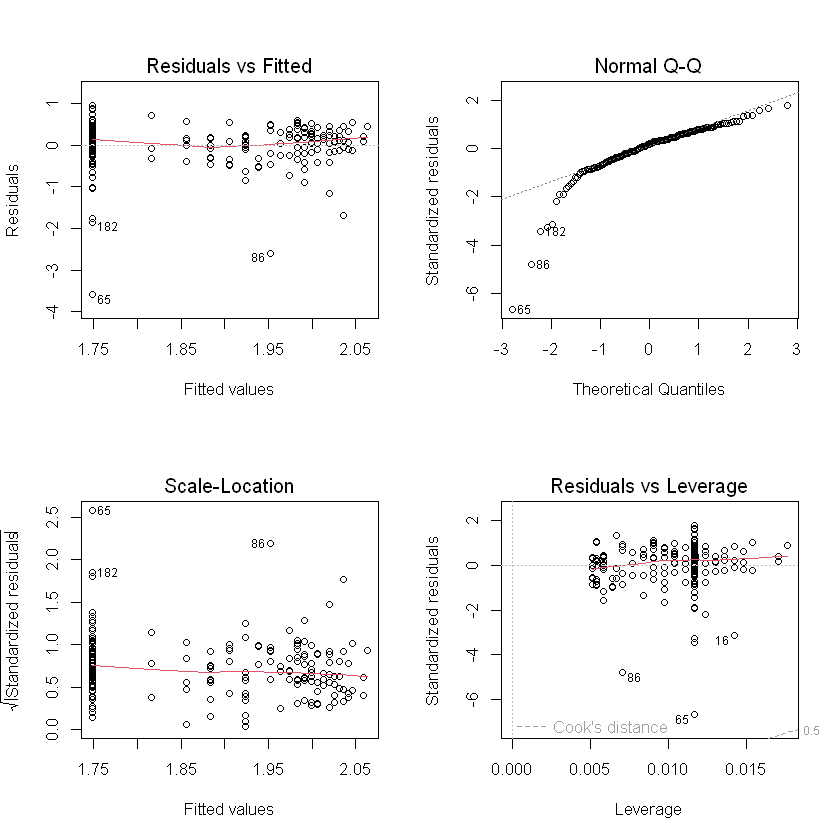

In [129]:
par(mfrow = c(2,2))
plot(modele5)

### Interval de confiance de beta0 et beta1

In [130]:
# Obtenir les intervalles de confiance des coefficients
conf_int <- confint(modele5) # Calculer les intervalles de confiance
# Afficher les résultats
conf_int


,2.5 %,97.5 %
(Intercept),1.63339134,1.8639703
log(X2 + 1),0.03382592,0.1615356


## Étude du modèle 3
Y = beta0 * exp[(beta1 * X1) + epsilon]

### Graphe de regression

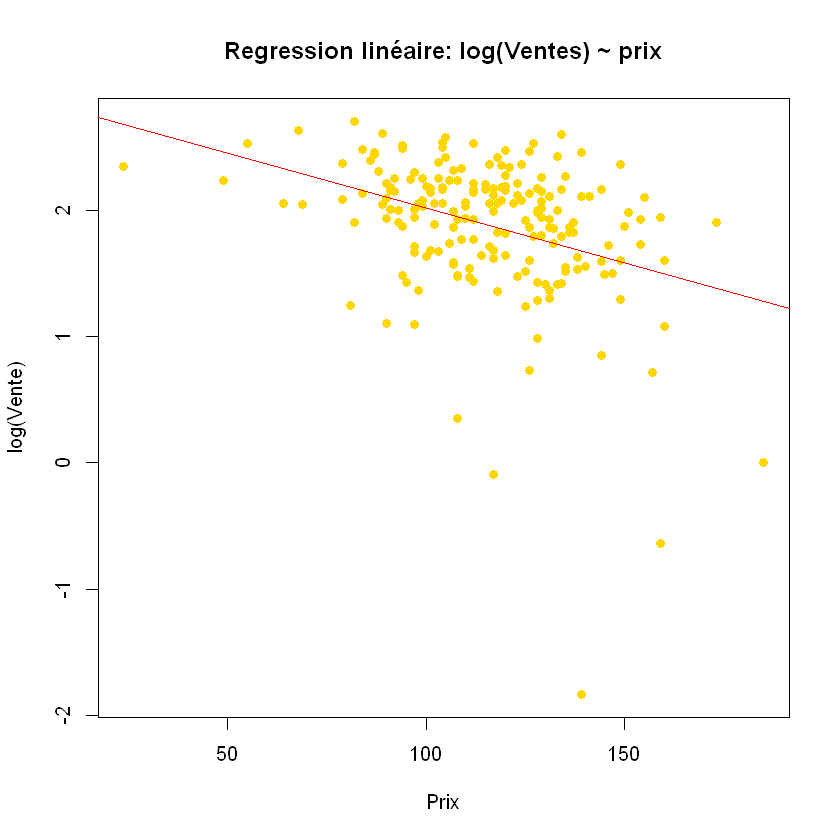

In [131]:
modele3 <- lm(log(Y) ~ (X1))

# Create a scatter plot of log(Y) against X1
plot(X1, log(Y), main = "Regression linéaire: log(Ventes) ~ prix", col = "gold",
     xlab = "Prix", ylab = "log(Vente)", pch = 16)

# Add the regression line
abline(modele3, col = "red")

### Tableau d'analyse de la variance

In [132]:
summary(modele3)
anova(modele3)


Call:
lm(formula = log(Y) ~ (X1))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5082 -0.2117  0.1009  0.3088  0.8753 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.886067   0.191310  15.086  < 2e-16 ***
X1          -0.008708   0.001626  -5.356 2.41e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5164 on 193 degrees of freedom
Multiple R-squared:  0.1294,	Adjusted R-squared:  0.1249 
F-statistic: 28.68 on 1 and 193 DF,  p-value: 2.407e-07


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,7.650003,7.6500029,28.685,2.407054e-07
Residuals,193,51.471180,0.2666901,NA,NA


### Analyse des résidus

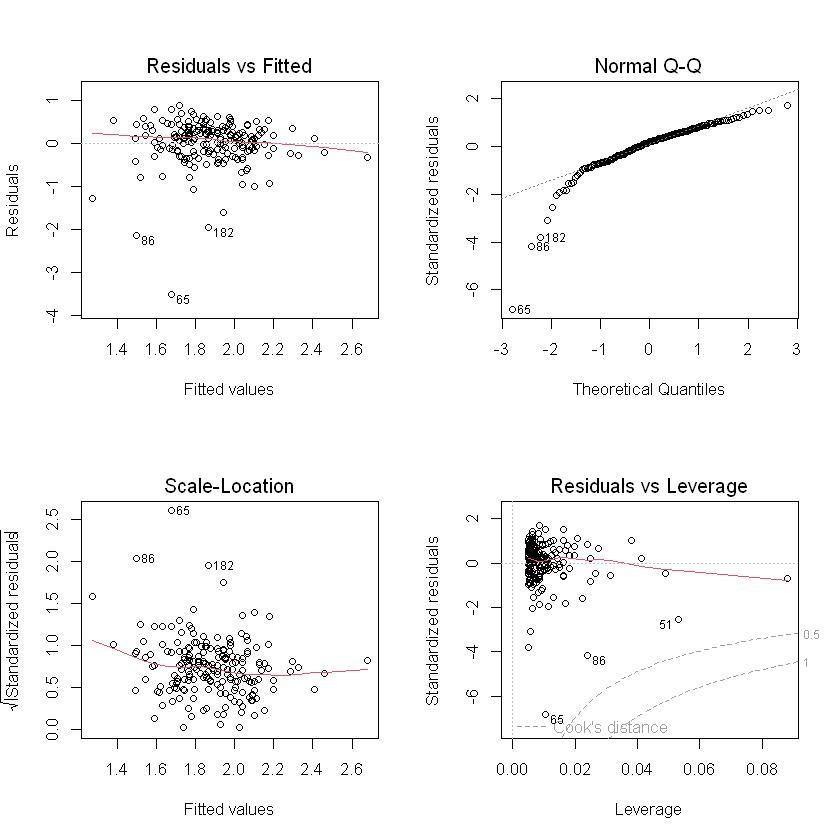

In [133]:
par(mfrow = c(2,2))
plot(modele3)

### Interval de confiance de beta0 et beta1

In [134]:
# Obtenir les intervalles de confiance des coefficients
conf_int <- confint(modele3) # Calculer les intervalles de confiance
# Afficher les résultats
conf_int


,2.5 %,97.5 %
(Intercept),2.5087406,3.263392759
X1,-0.0119147,-0.005501163


## Étude du modèle 6
Y = beta0 * exp[(beta1 * X2) + epsilon]

### Graphe de regression

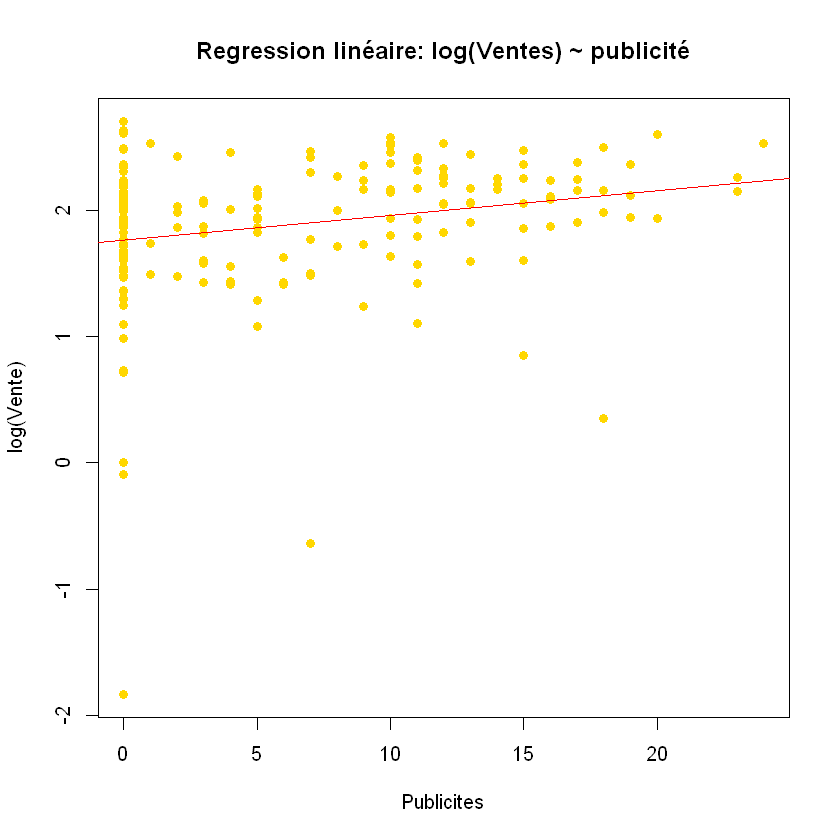

In [135]:
modele6 <- lm(log(Y) ~ X2)

# Create a scatter plot of log(Y) against X1
plot(X2, log(Y), main = "Regression linéaire: log(Ventes) ~ publicité", col = "gold",
     xlab = "Publicites", ylab = "log(Vente)", pch = 16)

# Add the regression line
abline(modele6, col = "red")

### Tableau d'analyse de la variance

In [136]:
summary(modele6)
anova(modele6)


Call:
lm(formula = log(Y) ~ X2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5946 -0.2097  0.0786  0.3039  0.9394 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.761991   0.052637  33.474   <2e-16 ***
X2          0.019629   0.005922   3.314   0.0011 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5384 on 193 degrees of freedom
Multiple R-squared:  0.05385,	Adjusted R-squared:  0.04895 
F-statistic: 10.98 on 1 and 193 DF,  p-value: 0.001097


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X2,1,3.183783,3.1837828,10.98496,0.001097021
Residuals,193,55.937400,0.2898311,NA,NA


### Analyse des résidus

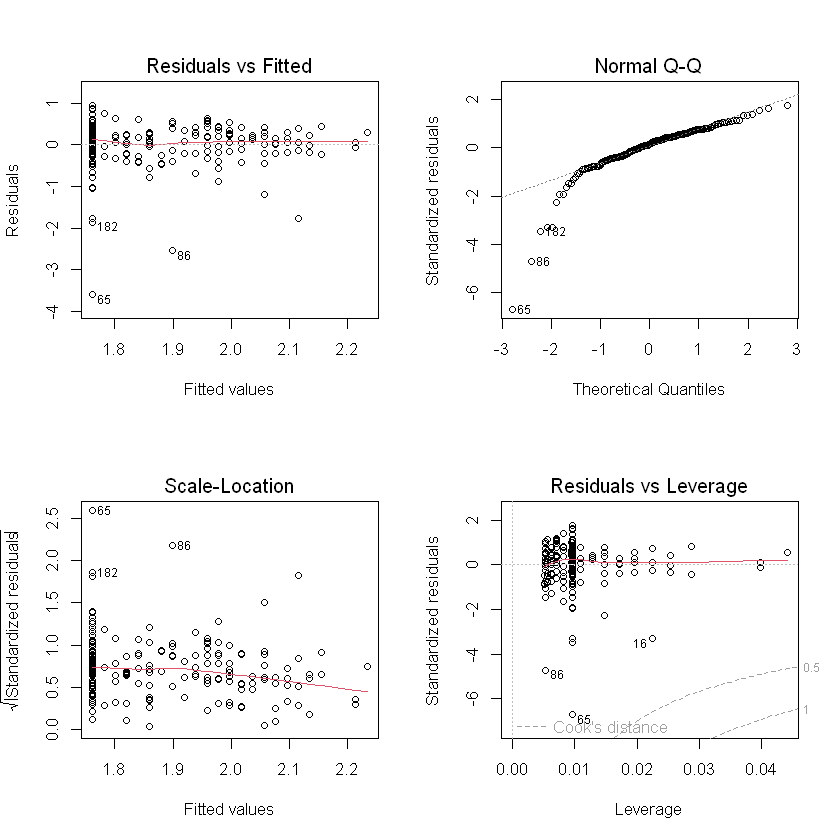

In [137]:
par(mfrow = c(2,2))
plot(modele6)

### Interval de confiance de beta0 et beta1

In [138]:
# Obtenir les intervalles de confiance des coefficients
conf_int <- confint(modele6) # Calculer les intervalles de confiance
# Afficher les résultats
conf_int


,2.5 %,97.5 %
(Intercept),1.658173818,1.86580864
X2,0.007947882,0.03130938


## Choix du meilleur modèle:

## Prévision des ventes en fonction du meilleur modele

In [139]:
predict

function (object, ...) 
UseMethod("predict")
<bytecode: 0x0000015893af3a60>
<environment: namespace:stats>